In [61]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)
import matplotlib.pyplot as plt
import pandas_profiling
from sklearn.preprocessing import StandardScaler
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.spatial import distance
import seaborn as sns
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer
from scipy import stats
from collections import Counter
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/stepthom/sandbox/master/data/jewelry_customers.csv")

In [63]:
print("Total number of rows and columns in the dataframe : ", df.shape)
df.info()

Total number of rows and columns in the dataframe :  (505, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [64]:
df.isnull().sum()  # Check for missing values

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

In [65]:
X = df.copy()  # Make a copy of a dataframe to feed into an algorithm
X              # Print Sample records


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
...,...,...,...,...
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445


<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Jewelry Customers Data')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Income')

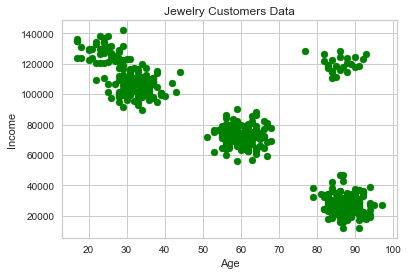

In [66]:
# Plot the original dataset Data 
plt.figure()
plt.title("Jewelry Customers Data")
plt.xlabel('Age')
plt.ylabel('Income')
plt.scatter(X.iloc[:,0],X.iloc[:,1], c="green")    # Scatterplot for Age against Income
plt.show()

<Figure size 432x288 with 0 Axes>

Text(0.5, 1.0, 'Jewelry Customers Data')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Spending Score')

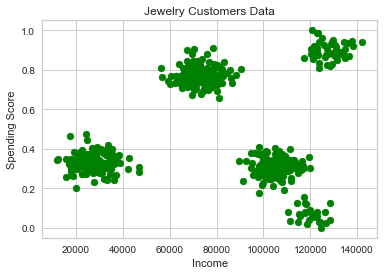

In [67]:
plt.figure()
plt.title("Jewelry Customers Data")
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.scatter(X.iloc[:,1],X.iloc[:,2], c="green")    # Scatterplot for Income against Spending Score
plt.show()

In [68]:
# Looking at the scatterplot we can visually see that the data is divided into five clusters
# Feature Engineering - applying standard scaling to the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X    

array([[-4.23e-02,  6.27e-02,  1.10e+00, -1.07e+00],
       [-8.21e-04,  1.75e-01,  1.10e+00, -1.30e+00],
       [ 1.24e-01, -2.12e-02,  7.62e-01, -5.27e-01],
       ...,
       [ 1.28e+00, -1.12e+00, -5.78e-01,  8.55e-01],
       [ 1.33e+00, -1.52e+00, -5.80e-01,  1.32e+00],
       [ 1.24e+00, -1.26e+00, -8.32e-01,  5.10e-01]])

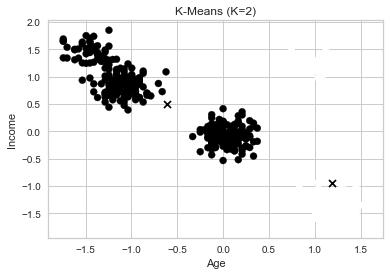

K=2, WCSS=1022.39, Sil=0.52


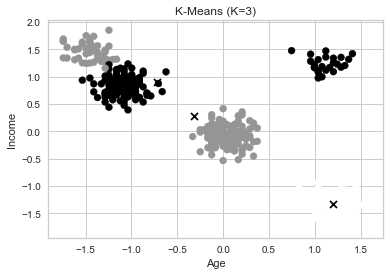

K=3, WCSS=384.81, Sil=0.70


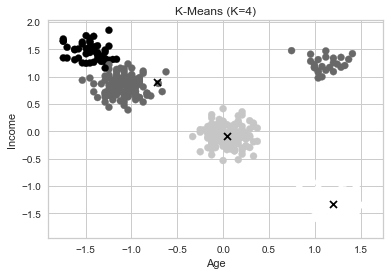

K=4, WCSS=189.70, Sil=0.76


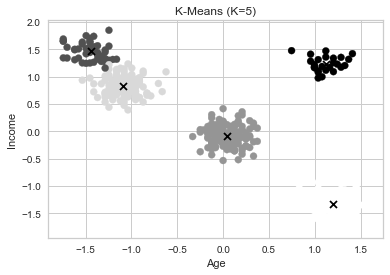

K=5, WCSS=66.51, Sil=0.80


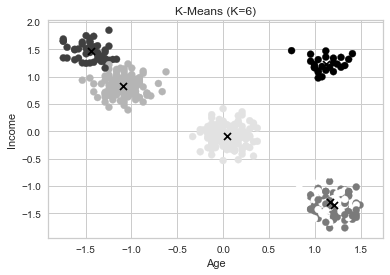

K=6, WCSS=61.14, Sil=0.63


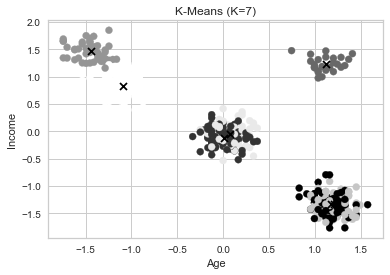

K=7, WCSS=56.89, Sil=0.45


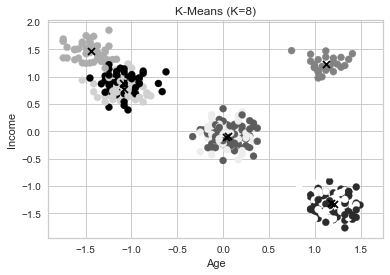

K=8, WCSS=52.92, Sil=0.30


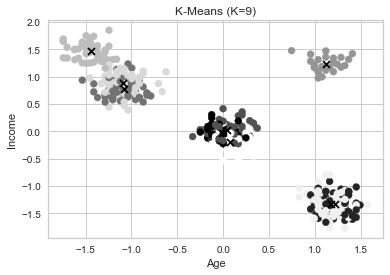

K=9, WCSS=50.25, Sil=0.30


In [69]:
# Apply K-means with different K values
def do_kmeans(X, k):          
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X[:, 0], X[:, 1], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Age');
    plt.ylabel('Income');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 10):         # Give range to try k-means with different values of K
    do_kmeans(X, k)

In [70]:
#As we saw in the scatterplot, data is divided into five clusters, lest run the k-means clustering with 5 clusters.

k_means = KMeans(init="k-means++", n_clusters=5, n_init=10, random_state=42)
k_means.fit(X)          # Fit the data into the algorithm

KMeans(n_clusters=5, random_state=42)

In [71]:
print("Cluster labels :")
k_means.labels_    # Print Cluster labels

print("Cluster Centers :")
k_means.cluster_centers_   # Print Cluster centers

print("Cluster Centers Inversed :")
scaler.inverse_transform(k_means.cluster_centers_)    # Print inversely transformed Cluster centers

Cluster labels :


array([2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 4, 1, 1, 1, 2, 4, 2, 0, 0, 4, 1, 4,
       2, 0, 4, 3, 3, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 2, 0, 3, 2,
       2, 3, 4, 3, 1, 2, 0, 1, 3, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 3, 3, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 3, 2, 4, 2, 0, 0, 1, 1, 2,
       2, 2, 2, 2, 3, 0, 2, 3, 1, 2, 2, 1, 1, 3, 1, 3, 1, 0, 0, 1, 1, 2,
       0, 1, 2, 1, 1, 1, 2, 1, 3, 0, 1, 0, 0, 0, 1, 4, 2, 0, 2, 2, 1, 2,
       1, 2, 3, 0, 4, 3, 2, 1, 0, 2, 2, 3, 2, 3, 2, 4, 2, 0, 2, 1, 0, 2,
       0, 4, 1, 2, 0, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       2, 0, 0, 0, 2, 2, 1, 3, 3, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 0, 3, 1,
       0, 0, 0, 1, 2, 1, 2, 1, 2, 0, 3, 2, 0, 0, 0, 0, 2, 0, 1, 3, 1, 0,
       2, 2, 1, 0, 1, 3, 1, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 1, 1, 3, 2,
       2, 2, 4, 2, 1, 0, 3, 3, 3, 0, 2, 1, 0, 0, 1, 1, 2, 2, 4, 2, 2, 0,
       2, 0, 1, 3, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 1, 1, 4, 1, 0,
       0, 1, 4, 0, 0, 3, 2, 1, 1, 2, 1, 0, 0, 1, 2,

Cluster Centers :


array([[ 1.19, -1.33, -0.68,  0.97],
       [-1.09,  0.83, -0.75,  0.63],
       [ 0.04, -0.09,  1.03, -1.01],
       [-1.44,  1.46,  1.51, -1.57],
       [ 1.12,  1.24, -1.68,  0.6 ]])

Cluster Centers Inversed :


array([[8.78e+01, 2.79e+04, 3.29e-01, 1.67e+04],
       [3.28e+01, 1.05e+05, 3.10e-01, 1.50e+04],
       [6.00e+01, 7.24e+04, 7.72e-01, 6.89e+03],
       [2.42e+01, 1.28e+05, 8.97e-01, 4.09e+03],
       [8.60e+01, 1.20e+05, 6.84e-02, 1.48e+04]])

Text(0.5, 1.0, 'K-Means (K=5)')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Annual Income')

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 9 Text major ticklabel objects>)

(array([-2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5]),
 <a list of 10 Text major ticklabel objects>)

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.1187615097372665, 1.235654192369486, '4')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(0.03879610999465229, -0.08524639295632362, '2')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(-1.4446680277775006, 1.4605066479893325, '3')

Text(-1.0881523772996022, 0.827441018631502, '1')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

Text(1.192384856571653, -1.3251059310348992, '0')

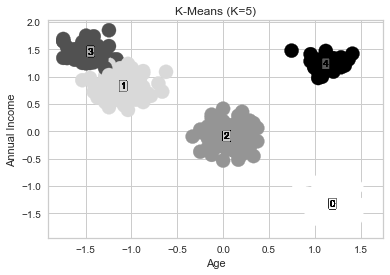

In [72]:
# Plot Clusters
sc = plt.scatter(X[:, 0], X[:, 1], s=200, c=k_means.labels_);
plt.title("K-Means (K=5)");
plt.xlabel('Age');
plt.ylabel('Annual Income');
plt.xticks();
plt.yticks();
for label in k_means.labels_:
    plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, 
             horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));

In [73]:
# K-means inertia and silhouette_score 

print("K-Means Inertia :")
k_means.inertia_
print("K-Means silhouette_score :")
silhouette_score(X, k_means.labels_)

K-Means Inertia :


66.51111374859076

K-Means silhouette_score :


0.8048976287755765

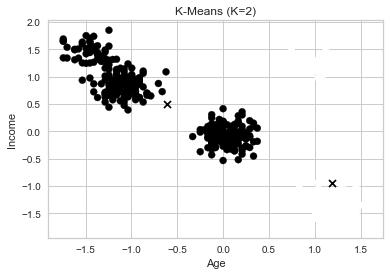

K=2, WCSS=1022.39, Sil=0.52


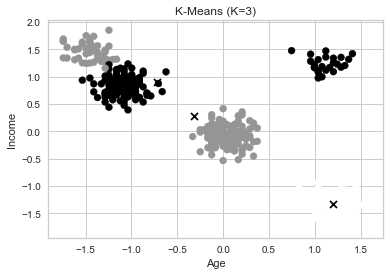

K=3, WCSS=384.81, Sil=0.70


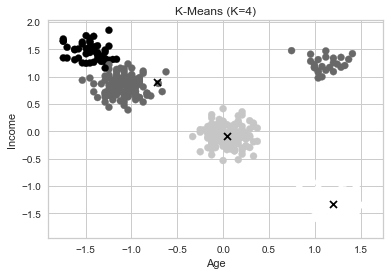

K=4, WCSS=189.70, Sil=0.76


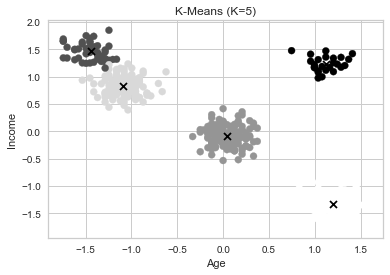

K=5, WCSS=66.51, Sil=0.80


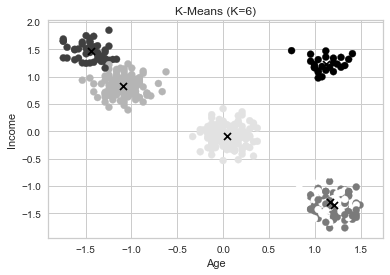

K=6, WCSS=61.14, Sil=0.63


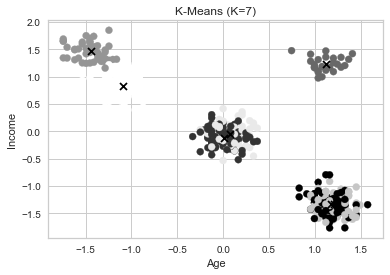

K=7, WCSS=56.89, Sil=0.45


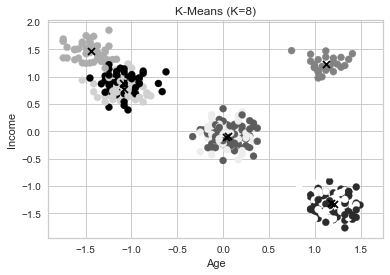

K=8, WCSS=52.92, Sil=0.30


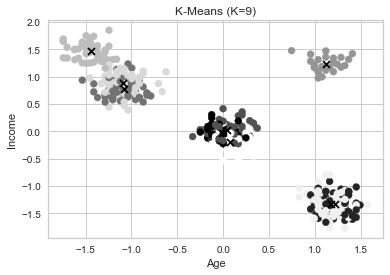

K=9, WCSS=50.25, Sil=0.30


In [74]:
# Run K-Means clustering with different values of K
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)

    plt.figure();
    plt.scatter(X[:, 0], X[:, 1], c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', c="black")
    plt.title("K-Means (K={})".format(k));
    plt.xlabel('Age');
    plt.ylabel('Income');
    #plt.savefig('out/simple_kmeans_k{}.png'.format(k))
    plt.show()
    
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 10):    # DEfine range for K
    do_kmeans(X, k)
    

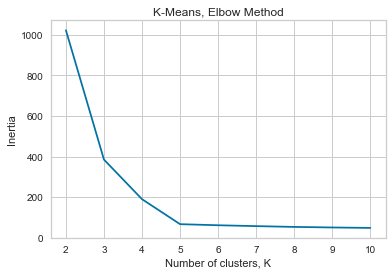

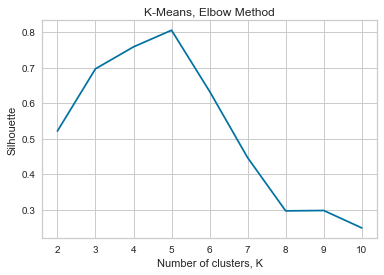

In [77]:
# Plot Elbow Plot
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    
# Elbow Plot against inertia
plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");

# Elbow Plot against silhouettes score
plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x000002836AFA8988>,
                     model=None)

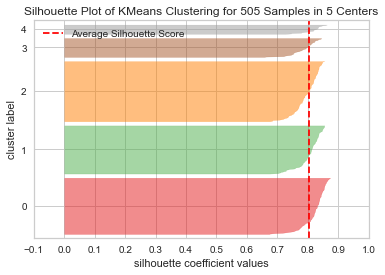

In [78]:
# Silhouette Coefficient of clusters
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()

In [79]:
# Print Clusters 
np.set_printoptions(formatter={'float':"{:6.7g}".format})
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    print(scaler.inverse_transform(X[k_means.labels_==label]))

print("Cluster counts:")
print(Counter(k_means.labels_))


Cluster 0:
[[    87  17760 0.3487775 16869.51]
 [    87  42592 0.3552897 18086.29]
 [    83  34384 0.3247187 14783.38]
 [    84  27693 0.367063 17879.56]
 [    87  31481 0.317424 16180.69]
 [    82  33636 0.371783 17866.83]
 [    91  22672 0.2710645 15407.65]
 [    90  37503 0.3577883 17258.57]
 [    88  17851 0.289866 17472.47]
 [    84  20704 0.3794963 16816.91]
 [    87  23042 0.366312 18149.04]
 [    84  18244 0.2926634 17815.35]
 [    91  24370 0.2963286 16141.05]
 [    91  26917 0.3767135 17986.62]
 [    83  28727 0.308263 18205.34]
 [    87  23322 0.3068212 16131.27]
 [    90  33188 0.2488101 15866.91]
 [    83  33170 0.2410777 16620.01]
 [    83  23206 0.3212404 16870.67]
 [    83  30721 0.3311418 17705.99]
 [    91  25886 0.3017538 17266.05]
 [    83  34529 0.3172075 16517.21]
 [    91  36991 0.2685979 19047.77]
 [    87  26045 0.3752921 15903.56]
 [    88  33303 0.3997157 15232.6]
 [    94  28352 0.3768757 16798.89]
 [    88  28802 0.4083878 16293.04]
 [    89  24520 0.44383

In [80]:
X = pd.DataFrame(X)
X.columns=['Age','Income','Spending Score','Savings']
X

,Age,Income,Spending Score,Savings
0,-0.042287,0.062733,1.103593,-1.072467
1,-0.000821,0.174811,1.102641,-1.303473
2,0.123577,-0.021200,0.761727,-0.526556
3,-0.000821,-0.031712,1.004705,-0.913395
4,1.160228,-1.606165,-0.602619,1.012686
...,...,...,...,...
500,-1.286268,0.714535,-0.453557,0.621787
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313
503,1.326092,-1.524929,-0.579866,1.322452


In [81]:
# Print Clusters
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = X[k_means.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    X_tmp.tail(13)


Cluster 0:


,Age,Income,Spending Score,Savings
485,1.284626,-1.466499,-0.573590,0.821470
486,1.326092,-1.316793,-0.776438,1.132151
488,1.367558,-1.579355,-0.683255,0.703620
489,1.574888,-1.341656,-0.852659,0.620046
490,1.035829,-1.086019,-0.583946,0.950770
493,1.367558,-1.098006,-0.648148,1.109584
494,1.160228,-1.268291,-0.628164,1.270098
497,1.326092,-1.244736,-0.776418,0.734084
501,1.409024,-1.545704,-1.164109,1.235201
502,1.284626,-1.118447,-0.578054,0.855313



Cluster 1:


,Age,Income,Spending Score,Savings
454,-1.161870,0.901590,-0.504442,0.069791
457,-0.996006,0.962051,-0.841685,0.619312
460,-1.286268,0.697459,-0.946440,0.739818
461,-1.078938,1.143099,-0.709982,0.655710
463,-1.286268,0.535322,-0.776811,0.705873
468,-1.120404,1.155169,-0.746896,0.495131
471,-1.161870,0.714618,-0.774009,1.022407
476,-1.078938,0.868912,-0.951075,0.519625
477,-1.078938,0.878451,-0.627070,0.613434
482,-1.120404,0.915078,-0.839366,0.977675



Cluster 2:


,Age,Income,Spending Score,Savings
467,0.082111,-0.096957,0.991771,-0.998383
469,0.165043,-0.137199,1.007903,-0.930429
470,-0.042287,-0.134529,0.998339,-0.849062
472,0.123577,-0.051124,1.123989,-1.450915
473,0.040645,-0.334767,0.951579,-0.873509
474,0.123577,-0.216432,1.210931,-1.194480
478,0.247975,-0.141370,0.739895,-0.989273
479,-0.000821,-0.169793,1.445093,-1.086232
480,0.247975,-0.119150,1.090334,-0.574015
491,-0.042287,-0.143067,1.539992,-0.890089



Cluster 3:


,Age,Income,Spending Score,Savings
406,-1.410666,1.263825,1.436486,-1.268526
412,-1.576530,1.507698,1.722243,-1.478797
415,-1.369200,1.394675,1.625959,-1.167596
442,-1.742394,1.689275,1.660880,-1.564668
445,-1.452132,1.250143,1.551423,-1.420640
451,-1.327734,1.311493,1.561530,-1.548476
456,-1.742394,1.343670,1.684540,-1.630882
458,-1.286268,1.451326,1.450948,-1.288677
466,-1.700928,1.340611,1.162288,-1.505162
487,-1.369200,1.320782,1.848446,-1.515115



Cluster 4:


,Age,Income,Spending Score,Savings
283,1.284626,1.353181,-1.828737,0.588746
288,0.994363,1.163428,-1.347032,0.652110
311,1.077295,1.186289,-1.472325,0.605440
312,1.201694,1.091677,-1.823122,1.207573
343,1.035829,1.104748,-1.682128,0.512529
351,1.326092,1.203671,-1.873225,0.441907
353,0.745567,1.476272,-1.789902,0.534138
368,1.035829,0.975288,-1.642530,0.622034
383,1.160228,1.169463,-1.452726,0.432373
414,1.201694,1.338748,-1.835384,0.332122


In [82]:
# Print Examplars 
for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = X[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(scaler.inverse_transform(X_tmp.iloc[exemplar_idx]))
    exemplar.index=['Age','Income','Spending Score','Savings']
    print('\nCluster {}:'.format(label))
    exemplar


Cluster 0:


,0
Age,89.000000
Income,26940.000000
Spending Score,0.326005
Savings,16555.159377



Cluster 1:


,0
Age,34.000000
Income,103204.000000
Spending Score,0.301087
Savings,15149.810421



Cluster 2:


,0
Age,61.000000
Income,72027.000000
Spending Score,0.762325
Savings,6926.123598



Cluster 3:


,0
Age,25.000000
Income,130934.000000
Spending Score,0.913766
Savings,3942.389134



Cluster 4:


,0
Age,86.000000
Income,115689.000000
Spending Score,0.057843
Savings,14803.153273


In [85]:
# Print Cluster Statistics/Summary
col_names = X.columns
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

def stats_to_df(d, scaler):
    tmp_df = pd.DataFrame(columns=col_names)
    
    tmp_df.loc[0] = scaler.inverse_transform(d.minmax[0])
    tmp_df.loc[1] = scaler.inverse_transform(d.mean)
    tmp_df.loc[2] = scaler.inverse_transform(d.minmax[1])
    tmp_df.loc[3] = scaler.inverse_transform(d.variance)
    tmp_df.loc[4] = scaler.inverse_transform(d.skewness)
    tmp_df.loc[5] = scaler.inverse_transform(d.kurtosis)
    tmp_df.index = ['Min', 'Mean', 'Max', 'Variance', 'Skewness', 'Kurtosis'] 
    return tmp_df.T

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
d = stats.describe(X, axis=0)
display(stats_to_df(d, scaler))

for i, label in enumerate(set(k_means.labels_)):
    d = stats.describe(X[k_means.labels_==label], axis=0)
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(d.nobs))
    display(stats_to_df(d, scaler))

All Data:
Number of Instances: 505


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,59.02,97.00,83.18,57.56,24.79
Income,12000.00,75513.29,142000.00,111541.90,70425.76,30539.63
Spending Score,0.00,0.51,1.00,0.76,0.57,0.14
Savings,0.00,11862.46,20000.00,16816.59,10068.59,4685.19



Cluster 0:
Number of Instances: 147


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,79.00,87.78,97.00,59.53,58.71,47.69
Income,12000.00,27866.10,46977.00,76669.86,80132.22,81449.08
Spending Score,0.20,0.33,0.47,0.51,0.59,0.63
Savings,13470.97,16659.26,20000.00,12145.91,11114.44,11991.20



Cluster 1:
Number of Instances: 126


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,22.00,32.78,44.00,59.62,62.86,66.99
Income,89598.00,105265.81,119877.00,76541.57,76634.13,64585.25
Spending Score,0.17,0.31,0.41,0.51,0.45,0.51
Savings,12207.53,14962.78,17968.55,12090.45,12134.49,10963.23



Cluster 2:
Number of Instances: 157


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,51.00,59.96,68.00,59.49,63.48,52.66
Income,56321.00,72448.06,90422.00,76596.27,80762.80,76774.09
Spending Score,0.66,0.77,0.91,0.51,0.61,0.58
Savings,4077.66,6889.97,10547.78,12086.41,13179.50,14336.46



Cluster 3:
Number of Instances: 50


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,17.00,24.18,31.00,59.58,49.02,45.82
Income,117108.00,128029.12,142000.00,76413.35,86686.66,52197.55
Spending Score,0.81,0.90,1.00,0.51,0.55,0.44
Savings,0.00,4087.52,6089.48,12192.66,6842.94,18038.91



Cluster 4:
Number of Instances: 25


,Min,Mean,Max,Variance,Skewness,Kurtosis
Age,77.00,86.00,93.00,59.58,56.77,58.46
Income,110582.00,119944.04,128596.00,76192.26,76326.08,48538.51
Spending Score,0.00,0.07,0.16,0.51,0.62,0.36
Savings,12554.69,14808.68,17833.09,12134.30,14948.38,14021.13


In [86]:
X_df = pd.DataFrame(scaler.inverse_transform(X), columns=col_names)
X_df['cluster'] = k_means.labels_
X_df.head()

,Age,Income,Spending Score,Savings,cluster
0,58.00,77769.00,0.79,6559.83,2
1,59.00,81799.00,0.79,5417.66,2
2,62.00,74751.00,0.70,9258.99,2
3,59.00,74373.00,0.77,7346.33,2
4,87.00,17760.00,0.35,16869.51,0


In [87]:
cl_group = X_df.groupby(['cluster']).agg('describe')
cl_group

Age                                          Income            ...  \
         count  mean  std   min   25%   50%   75%   max  count      mean  ...   
cluster                                                                   ...   
0       147.00 87.78 3.51 79.00 85.00 88.00 91.00 97.00 147.00  27866.10  ...   
1       126.00 32.78 3.79 22.00 30.00 33.00 35.00 44.00 126.00 105265.81  ...   
2       157.00 59.96 3.38 51.00 58.00 59.00 62.00 68.00 157.00  72448.06  ...   
3        50.00 24.18 3.66 17.00 22.00 24.50 27.00 31.00  50.00 128029.12  ...   
4        25.00 86.00 3.66 77.00 84.00 86.00 88.00 93.00  25.00 119944.04  ...   

        Spending Score      Savings                                     \
                   75%  max   count     mean     std      min      25%   
cluster                                                                  
0                 0.36 0.47  147.00 16659.26 1183.85 13470.97 15957.28   
1                 0.34 0.41  126.00 14962.78 1061.73 12207.53 14223.79   
2                 0.80 0.91  157.00  6889.97 1052.28  4077.66  6225.38   
3                 0.93 1.00   50.00  4087.52 1277.75     0.00  3275.32   
4                 0.08 0.16   25.00 14808.68 1159.34 12554.69 14047.39   

                                    
             50%      75%      max  
cluster                             
0       16711.07 17433.13 20000.00  
1       14976.94 15682.29 17968.55  
2        6845.06  7497.23 10547.78  
3        4361.97  4986.86  6089.48  
4       14773.41 15391.95 17833.09  

[5 rows x 32 columns]

In [88]:
cl_group.info()
cl_group['Age']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   (Age, count)             5 non-null      float64
 1   (Age, mean)              5 non-null      float64
 2   (Age, std)               5 non-null      float64
 3   (Age, min)               5 non-null      float64
 4   (Age, 25%)               5 non-null      float64
 5   (Age, 50%)               5 non-null      float64
 6   (Age, 75%)               5 non-null      float64
 7   (Age, max)               5 non-null      float64
 8   (Income, count)          5 non-null      float64
 9   (Income, mean)           5 non-null      float64
 10  (Income, std)            5 non-null      float64
 11  (Income, min)            5 non-null      float64
 12  (Income, 25%)            5 non-null      float64
 13  (Income, 50%)            5 non-null      float64
 14  (Income, 75%)            5 non

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,147.00,87.78,3.51,79.00,85.00,88.00,91.00,97.00
1,126.00,32.78,3.79,22.00,30.00,33.00,35.00,44.00
2,157.00,59.96,3.38,51.00,58.00,59.00,62.00,68.00
3,50.00,24.18,3.66,17.00,22.00,24.50,27.00,31.00
4,25.00,86.00,3.66,77.00,84.00,86.00,88.00,93.00


Text(0.5, 1.0, 'Snake Plot, K-Means, K=5')

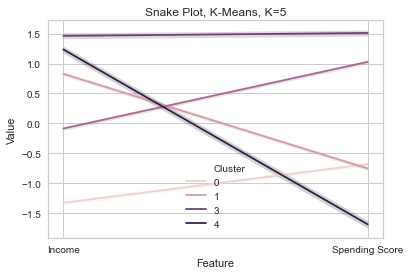

In [89]:
# Snake Plot
dat = X.copy()

dat['Cluster'] = k_means.labels_

datamart_melt = pd.melt(dat.reset_index(),
id_vars=['Cluster'],
value_vars=['Income','Spending Score'],
var_name='Feature',
value_name='Value')

plt.title('Snake Plot, K-Means, K=5')
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=datamart_melt)

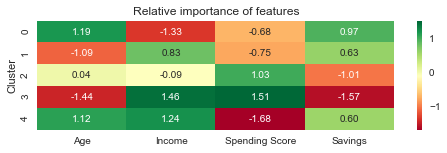

In [90]:
# Relative Imprtance plot
cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');